In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Sleep_Disorder_Preprocessed.csv")

- Label Encode each categorical feature
- Scale each numerical feature by MinMaxScaler

In [3]:
Encoder = LabelEncoder()
Scaler = MinMaxScaler()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = Encoder.fit_transform(df[col])   


X = df.drop("Sleep Disorder",axis=1)
y = df["Sleep Disorder"]
X_Scaled = Scaler.fit_transform(X)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X_Scaled,y,random_state=42,test_size=0.2)

- Trainning some base models first for inspecting the right one

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



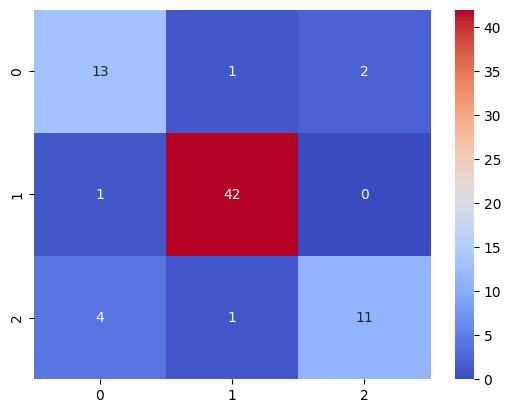

In [5]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(max_depth=7,random_state=42,criterion='entropy',n_estimators=250)

rf_clf.fit(X_train,y_train)
preds = rf_clf.predict(X_test)

f1_rf = f1_score(y_test,preds,average='macro')
cm_rf = confusion_matrix(y_test,preds)

rf_report = classification_report(y_test,preds)
print(rf_report)
sns.heatmap(cm_rf,annot=True,cmap='coolwarm')
plt.show()


              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.98      0.97        43
           2       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75



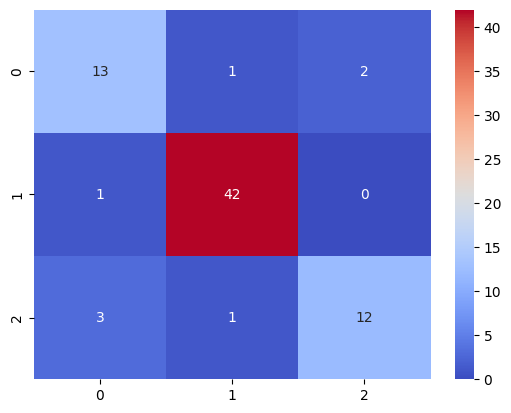

In [6]:
# XG Booster Classifier
xg_clf = XGBClassifier(n_estimators=100,max_depth=4,random_state=42)

xg_clf.fit(X_train,y_train)
preds_xg = xg_clf.predict(X_test)

cm_xg = confusion_matrix(y_test,preds_xg)

xg_report = classification_report(y_test,preds_xg)
print(xg_report)
sns.heatmap(cm_xg,annot=True,cmap='coolwarm')
plt.show()


- XGBoosting is better as a baseline model perfomance so we are going to Hyperparameter it !!

In [7]:
X_train_,X_test_,y_train_,y_test_ = train_test_split(X_Scaled,y,random_state=42,test_size=0.2,stratify=y) # use stratify 

xg_clf = XGBClassifier(random_state=42)

CV = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

param_grid = {"max_depth":[i for i in range(2,5)],
              "n_estimators":[50,100,150,200,250]}

best_xg = GridSearchCV(estimator=xg_clf,cv=CV,param_grid=param_grid,verbose=1,scoring='f1_weighted')
best_xg.fit(X_train_,y_train_)
best_xg.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [8]:
print(best_xg.best_params_)
print(best_xg.best_score_)

{'max_depth': 2, 'n_estimators': 50}
0.8920844953915834


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       1.00      1.00      1.00        44
           2       0.94      0.94      0.94        16

    accuracy                           0.97        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.97      0.97      0.97        75



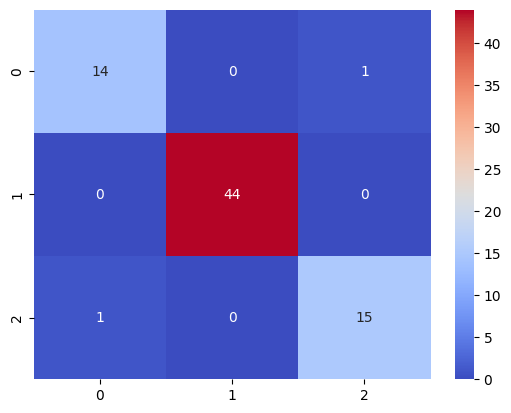

In [9]:

preds_xg_hypered = best_xg.predict(X_test_)
cm_xg_hypered = confusion_matrix(y_test_,preds_xg_hypered)

xg_hypered_report = classification_report(y_test_,preds_xg_hypered)
print(xg_hypered_report)
sns.heatmap(cm_xg_hypered,annot=True,cmap='coolwarm')
plt.show()

- Hyperparameter Tunning XGBClassifier led to a higher F1,Prescion,Recall and Accuarcy scores across classes.
- We are done Here.